# MET Data Set Analysis

1. Goal/Question we answer with the group of data:
2. The three coolest data cleaning/wrangling steps:
3. The graph with the coolest insight about the data or prettiest view of it 
4. Any roadblocks we’re facing:


Also: should we follow the following EDA steps:
> 1. Description
> 2. Making Data Dictionary
> 3. QA (Quality Assurance)
> 4. Variable Distributions
> 5. Comparisons


In [264]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib.style as style

%matplotlib inline

In [265]:
met = pd.read_csv('MET.csv')

In [266]:
met.head()

,Object Number,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,...,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL
0,1979.486.1,False,False,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
1,1980.264.5,False,False,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
2,67.265.9,False,False,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
3,67.265.10,False,False,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
4,67.265.11,False,False,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN


In [267]:
met.columns

Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Is Timeline Work',
       'Object ID', 'Department', 'AccessionYear', 'Object Name', 'Title',
       'Culture', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Artist Role',
       'Artist Prefix', 'Artist Display Name', 'Artist Display Bio',
       'Artist Suffix', 'Artist Alpha Sort', 'Artist Nationality',
       'Artist Begin Date', 'Artist End Date', 'Artist Gender',
       'Artist ULAN URL', 'Artist Wikidata URL', 'Object Date',
       'Object Begin Date', 'Object End Date', 'Medium', 'Dimensions',
       'Credit Line', 'Geography Type', 'City', 'State', 'County', 'Country',
       'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River',
       'Classification', 'Rights and Reproduction', 'Link Resource',
       'Object Wikidata URL', 'Metadata Date', 'Repository', 'Tags',
       'Tags AAT URL'],
      dtype='object')

In [268]:
met.shape

(474383, 51)

In [269]:
met.dtypes

Object Number               object
Is Highlight                  bool
Is Public Domain              bool
Is Timeline Work              bool
Object ID                    int64
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date                 object
Object Begin Date            int64
Object End Date     

## Removing Columns
Removed unecessary columns and columns with a large amount of null entries

In [270]:
remove = ['Object Number', 'Artist Prefix', 'Portfolio', 'Artist Suffix', 
          'Artist ULAN URL', 'Artist Wikidata URL', 'Artist Alpha Sort', 
          'Geography Type', 'Excavation', 'River', 'Classification', 
          'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL', 
          'Metadata Date', 'Repository', 'Tags AAT URL']
met = met.drop(remove, axis=1)
met.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,...,Credit Line,City,State,County,Country,Region,Subregion,Locale,Locus,Tags
0,False,False,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,NaN,...,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,False,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,...,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,False,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
print(met.isnull().sum())

Is Highlight                0
Is Public Domain            0
Is Timeline Work            0
Object ID                   0
Department                  0
AccessionYear            4156
Object Name              1936
Title                   29894
Culture                268151
Period                 385000
Dynasty                451247
Reign                  463207
Artist Role            204041
Artist Display Name    201947
Artist Display Bio     241101
Artist Nationality     291952
Artist Begin Date      238471
Artist End Date        238473
Artist Gender          373500
Object Date             14998
Object Begin Date           0
Object End Date             0
Medium                   7153
Dimensions              75485
Credit Line               417
City                   442624
State                  471855
County                 466143
Country                399296
Region                 443048
Subregion              452327
Locale                 458773
Locus                  466986
Tags      

In [272]:
met.shape

(474383, 34)

In [273]:
#Period, Dynasty, Reign, Artist Display Bio, Artist Nationality?, Artist Gender?, City, State, County, Country,
#Region, Subregion, Locale, Locus
blank = ['Period', 'Dynasty', 'Reign', 'Artist Display Bio', 'Artist Gender', 'City', 'State', 'County', 'Country', 
         'Region', 'Subregion', 'Locale', 'Locus']
met = met.drop(blank, axis=1)
met.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Tags
0,False,False,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,Maker,...,American,1794,1869,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN
1,False,False,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,...,NaN,1785,1844,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN
2,False,False,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN
3,False,False,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN
4,False,False,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN


## Removed Duplicate Entries

In [274]:
#if met[met.duplicated()].shape[0] != 0: 
#    met=met.drop_duplicates(keep='first')

In [275]:
duplicate_rows_art = met[met.duplicated()]
print(met.duplicated())
print(duplicate_rows_art.shape)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
474353    False
474354    False
474355    False
474356    False
474357    False
474358    False
474359    False
474360    False
474361    False
474362    False
474363    False
474364    False
474365    False
474366    False
474367    False
474368    False
474369    False
474370    False
474371    False
474372    False
474373    False
474374    False
474375    False
474376    False
474377    False
474378    False
474379    False
474380    False
474381    False
474382    False
Length: 474383, dtype: b

#### *Comment: None of the Rows are duplicate of the others*

## Sorting Meaningful Rows

1. Sort the dataframe by Object Begin date and filter out objects without dates or have dates that doesn't make sense
>According to observation, among the artworks in dataframe, it is very likely that among Object Date, Object Begin Date, Object End Date, Artist Begin Date, and Artist End Date, there's at least one grid that has relavant data that give insight on the year the object/artwork was created/completed. Thus when filtering the rows, I did not get rid of the rows with NaNs in parts of these date grids. 

In [276]:
met = met[met["Object Begin Date"].notnull() 
          & ((met["Object Begin Date"] != 0) 
             | (met["Object End Date"] != 0)) 
          & ((met["Object Begin Date"] <= 2020) 
             | (met["Object End Date"] <= 2020))].sort_values(by="Object Begin Date", ascending=True)
met.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Tags
363928,False,False,True,573104,Egyptian Art,1906,"Tool, biface, hand ax, sub-cordiform","Biface, commonly referred to as a hand ax",NaN,NaN,...,NaN,NaN,NaN,"ca. 400,000–240,000 B.C.",-400000,-240000,Flint,"L. 9.6 × W. 6.5 × Th. 1.9 cm, Wt. 122.7g (3 13...","Gift of C. T. Currelly, 1906",Tools and Equipment
363920,False,False,True,573096,Egyptian Art,1906,"Tool, Biface, Hand-axe, Ovate","Biface, commonly referred to as a hand ax",NaN,NaN,...,NaN,NaN,NaN,"ca. 400,000–240,000 B.C.",-400000,-240000,Flint,"L. 11.9 × W. 8.2 × Th. 4 cm, Wt. 356.5g (4 11/...","Gift of C. T. Currelly, 1906",Tools and Equipment
470109,False,False,True,832566,Arms and Armor,1999,Biface,Biface,Acheulean,NaN,...,NaN,NaN,NaN,"ca. 400,000–150,000 B.C.",-300050,-125000,Flint,L. 9 3/4 in. (24.8 cm); W. 4 3/4 in. (12.1 cm)...,"Purchase, Friends of Arms and Armor Gifts, 2019",NaN
363916,False,False,True,573092,Egyptian Art,1906,"Tool, point, Levallois",Retouched Levallois Point,NaN,NaN,...,NaN,NaN,NaN,"ca. 240,000–40,000 B.C.",-240000,-40000,Flint,"L. 10.9 × W. 3.8 × Th. 0.9 cm, Wt. 32.5g (4 1/...","Gift of C. T. Currelly, 1906",NaN
363918,False,False,True,573094,Egyptian Art,1906,"Tool, Levallois, Point",Atypical Levallois Point,NaN,NaN,...,NaN,NaN,NaN,"ca. 240,000–40,000",-240000,-40000,Flint,"L. 12.1 × W. 5.6 × Th. 1.1 cm, Wt. 72.5g (4 3/...","Gift of C. T. Currelly, 1906",NaN


In [277]:
met.shape

(473263, 21)

### Sorting the Artwork by department

In [278]:
met.groupby("Department")["Title"].count()

Department
Ancient Near Eastern Art                       6189
Arms and Armor                                13581
Arts of Africa, Oceania, and the Americas     12311
Asian Art                                      6570
Costume Institute                             31210
Drawings and Prints                          165860
Egyptian Art                                  27739
European Paintings                             2593
European Sculpture and Decorative Arts        42826
Greek and Roman Art                           33627
Islamic Art                                   15242
Medieval Art                                   7144
Modern and Contemporary Art                   13912
Musical Instruments                            5036
Photographs                                   36615
Robert Lehman Collection                       2583
The American Wing                             18111
The Cloisters                                  2343
The Libraries                                   280
N

**Comment: should we pick some categories to analyze?**

In [279]:
# example: an analysis of the accession year of drawings and Prints at the MET and it's implication

In [280]:
met.AccessionYear.unique()

array([1906.0, 1999.0, 1925.0, 1912.0, 2015.0, 1953.0, 1908.0, 1994.0,
       1950.0, 1985.0, 1874.0, 1914.0, 1924.0, 1917.0, 1941.0, 1907.0,
       1915.0, 1911.0, 1913.0, 1933.0, 1949.0, 1910.0, 1926.0, 1881.0,
       1895.0, 1972.0, 1886.0, 1889.0, 1891.0, 1894.0, 1942.0, 1992.0,
       1898.0, 1900.0, 1901.0, 1903.0, 1904.0, 1905.0, 1896.0, 1967.0,
       1960.0, 1897.0, 1964.0, nan, 1909.0, 1920.0, 1919.0, 1918.0,
       1923.0, 1929.0, 1927.0, 1928.0, 1921.0, 1932.0, 1922.0, 1930.0,
       '1917', 1984.0, 1916.0, 1948.0, 1962.0, 1892.0, 1893.0, 1963.0,
       1986.0, 1988.0, 1983.0, 1959.0, 1899.0, 1952.0, 1938.0, 2011.0,
       1976.0, 1968.0, 2013.0, 2004.0, 1978.0, 1951.0, 1902.0, 1936.0,
       1956.0, 2001.0, 1993.0, 1973.0, 1997.0, 1957.0, 1944.0, 1955.0,
       1939.0, 1946.0, 1966.0, 1935.0, 1931.0, 1954.0, 2003.0, 1987.0,
       1989.0, 1975.0, 2009.0, 1998.0, 1981.0, 2002.0, 1980.0, 1995.0,
       1961.0, 1958.0, 1945.0, 1890.0, 1971.0, 1979.0, 1947.0, 1996.0,
       19

In [281]:
met = met.drop(met.index[met["AccessionYear"] == "2005-02-15"])
#met = met.dropna(subset=["AccessionYear"])
met = met[pd.to_numeric(met["AccessionYear"], errors='coerce').notnull()]
met.head()
#.AccessionYear.astype(int)
#met = met[met["Department"] == "Drawings and Prints"].sort_values(by=["AccessionYear"], ascending=True).head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Tags
363928,False,False,True,573104,Egyptian Art,1906,"Tool, biface, hand ax, sub-cordiform","Biface, commonly referred to as a hand ax",NaN,NaN,...,NaN,NaN,NaN,"ca. 400,000–240,000 B.C.",-400000,-240000,Flint,"L. 9.6 × W. 6.5 × Th. 1.9 cm, Wt. 122.7g (3 13...","Gift of C. T. Currelly, 1906",Tools and Equipment
363920,False,False,True,573096,Egyptian Art,1906,"Tool, Biface, Hand-axe, Ovate","Biface, commonly referred to as a hand ax",NaN,NaN,...,NaN,NaN,NaN,"ca. 400,000–240,000 B.C.",-400000,-240000,Flint,"L. 11.9 × W. 8.2 × Th. 4 cm, Wt. 356.5g (4 11/...","Gift of C. T. Currelly, 1906",Tools and Equipment
470109,False,False,True,832566,Arms and Armor,1999,Biface,Biface,Acheulean,NaN,...,NaN,NaN,NaN,"ca. 400,000–150,000 B.C.",-300050,-125000,Flint,L. 9 3/4 in. (24.8 cm); W. 4 3/4 in. (12.1 cm)...,"Purchase, Friends of Arms and Armor Gifts, 2019",NaN
363916,False,False,True,573092,Egyptian Art,1906,"Tool, point, Levallois",Retouched Levallois Point,NaN,NaN,...,NaN,NaN,NaN,"ca. 240,000–40,000 B.C.",-240000,-40000,Flint,"L. 10.9 × W. 3.8 × Th. 0.9 cm, Wt. 32.5g (4 1/...","Gift of C. T. Currelly, 1906",NaN
363918,False,False,True,573094,Egyptian Art,1906,"Tool, Levallois, Point",Atypical Levallois Point,NaN,NaN,...,NaN,NaN,NaN,"ca. 240,000–40,000",-240000,-40000,Flint,"L. 12.1 × W. 5.6 × Th. 1.1 cm, Wt. 72.5g (4 3/...","Gift of C. T. Currelly, 1906",NaN


In [282]:
met = met.astype({"AccessionYear": int})
met.AccessionYear.unique()
#met = met[met["Department"] == "Drawings and Prints"].sort_values(by=["AccessionYear"], ascending=True)
#met

array([1906, 1999, 1925, 1912, 2015, 1953, 1908, 1994, 1950, 1985, 1874,
       1914, 1924, 1917, 1941, 1907, 1915, 1911, 1913, 1933, 1949, 1910,
       1926, 1881, 1895, 1972, 1886, 1889, 1891, 1894, 1942, 1992, 1898,
       1900, 1901, 1903, 1904, 1905, 1896, 1967, 1960, 1897, 1964, 1909,
       1920, 1919, 1918, 1923, 1929, 1927, 1928, 1921, 1932, 1922, 1930,
       1984, 1916, 1948, 1962, 1892, 1893, 1963, 1986, 1988, 1983, 1959,
       1899, 1952, 1938, 2011, 1976, 1968, 2013, 2004, 1978, 1951, 1902,
       1936, 1956, 2001, 1993, 1973, 1997, 1957, 1944, 1955, 1939, 1946,
       1966, 1935, 1931, 1954, 2003, 1987, 1989, 1975, 2009, 1998, 1981,
       2002, 1980, 1995, 1961, 1958, 1945, 1890, 1971, 1979, 1947, 1996,
       1982, 2007, 1940, 1965, 2000, 1934, 2005, 1970, 1977, 1969, 1943,
       1974, 2014, 1937, 1991, 2008, 2010, 2006, 2012, 1990, 2018, 2019,
       2017, 2016, 1875, 1884, 1876, 1885, 1879, 1888, 1882, 1870, 1877,
       1887, 1873, 2020, 1883, 1880, 1871, 1872, 18

In [283]:
m = met[met["Department"] == "Drawings and Prints"].sort_values(by=["AccessionYear"], ascending=True)
m

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Tags
250748,False,False,False,383857,Drawings and Prints,1876,Plate,Winter Hawk. Falco Hyemalis / Bull-frog. Rana ...,NaN,Artist|Etcher,...,"American, born Haiti|American, born England",1785 |1793,1851 |1878,1829,1829,1829,Printing plate: etching and aquatint on copper...,plate: 26 3/16 x 39 3/16 in. (66.5 x 99.5 cm),"Gift of William E. Dodge Jr., 1876",NaN
250749,False,False,False,383858,Drawings and Prints,1876,Plate,Common Buzzard. Buteo Vulgaris / Marsh Hare. S...,NaN,Artist|Etcher,...,"American, born Haiti|American, born England",1785 |1793,1851 |1878,1837,1837,1837,Printing plate: etching and aquatint on copper...,plate: 27 15/16 x 24 in. (71 x 61 cm),"Gift of William E. Dodge Jr., 1876",NaN
250746,False,False,False,383855,Drawings and Prints,1876,Plate,Bird of Washington. Falco Washingtonii,NaN,Artist|Etcher,...,"American, born Haiti|American, born England",1785 |1793,1851 |1878,1827,1827,1827,Printing plate: etching and aquatint on copper...,plate: 39 x 26 in. (99.1 x 66 cm),"Gift of William E. Dodge Jr., 1876",NaN
250750,False,False,False,383859,Drawings and Prints,1876,Plate,Yellow-billed Cuckoo. Coccyzus Americanus Bona...,NaN,Artist|Etcher|Etcher,...,"American, born Haiti|British, Scottish|America...",1785 |1788 |1793,1851 |1859 |1878,1827,1827,1827,Printing plate: etching and aquatint on copper...,plate: 21 1/4 x 26 15/16 in. (54 x 68.4 cm),"Gift of William E. Dodge Jr., 1876",NaN
250743,False,False,False,383852,Drawings and Prints,1876,Plate,"Brown Pelican. Pelicanus Fuscus. Young, First ...",NaN,Artist|Etcher,...,"American, born Haiti|American, born England",1785 |1793,1851 |1878,1838,1838,1838,Printing plate: etching and aquatint on copper...,plate: 26 1/4 x 39 3/16 in. (66.6 x 99.5 cm),"Gift of William E. Dodge Jr., 1876",NaN
250747,False,False,False,383856,Drawings and Prints,1876,Plate,Brasilian Caracara Eagle. Polyborus Vulgaris,NaN,Artist|Etcher,...,"American, born Haiti|American, born England",1785 |1793,1851 |1878,1833,1833,1833,Printing plate: etching and aquatint on copper...,plate: 39 1/4 x 26 1/8 in. (99.7 x 66.4 cm),"Gift of William E. Dodge Jr., 1876",NaN
227177,False,False,True,359160,Drawings and Prints,1878,Drawing,Windsor from Datchet,NaN,Artist,...,British,1815,1887,1870–78,1870,1878,Watercolor,Sheet: 8 1/2 x 13 3/4 in. (21.6 x 34.9 cm),"Gift of Herbert R. Houghton, 1878",Landscapes|Trees|Boats
460385,False,False,True,812003,Drawings and Prints,1879,Silhouette,Portrait of George Washington,NaN,Sitter|Artist,...,NaN,1732,1799,ca. 1798,1798,1798,Hollow-cut silhouette on linen,Mat: 27 15/16 × 21 1/4 in. (71 × 54 cm)\r\nFra...,"Gift of Mrs. S. W. Oakey, 1879",George Washington|Men|Portraits|Profiles
210306,False,False,True,341954,Drawings and Prints,1880,Drawing,Group of Five Male Figures in Half-length,NaN,Artist,...,Italian,1610,1664,1640–50,1640,1650,"Pen and brown ink, over black chalk; glued ont...",2 1/4 x 4 3/8in. (5.7 x 11.1cm),"Gift of Cornelius Vanderbilt, 1880",Men
210355,False,False,True,342003,Drawings and Prints,1880,Drawing,Landscape,NaN,Artist,...,Italian,1700,1750,18th century,1700,1800,Red chalk,5-1/4 x 10-1/2 in. (13.3 x 26.7 cm),"Gift of Cornelius Vanderbilt, 1880",Houses|Towers|Landscapes|Trees


In [284]:
#met_year_data = met.groupby("AccessionYear")["Title"].count()
#met_year_data
met_mini_data = m[["AccessionYear", "Title"]].groupby("AccessionYear", as_index=False).count()
met_mini_data

,AccessionYear,Title
0,1876,6
1,1878,1
2,1879,1
3,1880,672
4,1882,1
5,1883,226
6,1884,1
7,1887,193
8,1888,17
9,1889,2


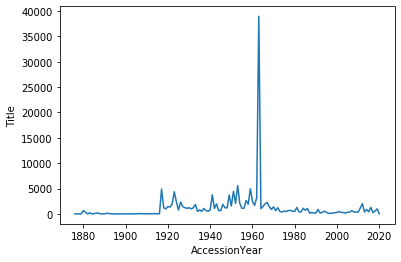

In [285]:
lp = sns.lineplot(x="AccessionYear", y="Title", data=met_mini_data)

In [299]:
highlights = met[met['Is Highlight']==True]
highlights.isnull().mean()

Is Highlight           0.000000
Is Public Domain       0.000000
Is Timeline Work       0.000000
Object ID              0.000000
Department             0.000000
AccessionYear          0.000000
Object Name            0.013738
Title                  0.013738
Culture                0.440756
Artist Role            0.428735
Artist Display Name    0.416142
Artist Nationality     0.500286
Artist Begin Date      0.454493
Artist End Date        0.454493
Object Date            0.000572
Object Begin Date      0.000000
Object End Date        0.000000
Medium                 0.012593
Dimensions             0.058958
Credit Line            0.000572
Tags                   0.158558
dtype: float64

In [301]:
highlights = highlights.dropna(subset=['Culture'])
commas = [c.split(',')[0] if ',' in c else c for c in highlights.Culture]

In [302]:
highlights['Culture'] = commas
highlights.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Nationality,Artist Begin Date,Artist End Date,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Tags
201257,True,True,True,327066,Ancient Near Eastern Art,1985,Sculpture,Seated female,Halaf,NaN,...,NaN,NaN,NaN,ca. 5600–5000 B.C.,-5600,-5000,"Ceramic, paint","H. 5.1 cm, W. 4.5 cm","Purchase, Leon Levy and Shelby White Gift, 1985",Female Nudes
154322,True,True,True,255417,Greek and Roman Art,1972,"Statuette of a woman, steatopygous",Marble female figure,Cycladic,NaN,...,NaN,NaN,NaN,4500–4000 B.C.,-4999,-4000,Marble,H. 8 7/16 in. (21.4 cm),"Bequest of Walter C. Baker, 1971",Women
202151,True,True,True,329081,Ancient Near Eastern Art,1988,Cuneiform tablet,Proto-Cuneiform tablet with seal impressions: ...,Sumerian,NaN,...,NaN,NaN,NaN,ca. 3100–2900 B.C.,-3100,-2900,Clay,2 1/8 × 2 3/8 × 1 5/8 in. (5.4 × 6 × 4.1 cm),"Purchase, Raymond and Beverly Sackler Gift, 1988",Men|Cuneiform|Boars|Dogs|Documents
202144,True,True,True,329074,Ancient Near Eastern Art,1966,Sculpture,Kneeling bull holding a spouted vessel,Proto-Elamite,NaN,...,NaN,NaN,NaN,ca. 3100–2900 B.C.,-3100,-2900,Silver,6 7/16 x 2 1/2 x 4 1/4in. (16.3 x 6.3 x 10.8cm),"Purchase, Joseph Pulitzer Bequest, 1966",Bulls
190839,True,True,True,314204,"Arts of Africa, Oceania, and the Americas",1980,Female figure,Female Figure,Valdivia,NaN,...,NaN,NaN,NaN,late 3rd millennium B.C.,-3000,-2000,Ceramic,H. 3 5/8 × W. 1 × D. 1 in. (9.2 × 2.5 × 2.5 cm),"Gift of Timothy, Peter, and Jonathan Zorach, 1980",Female Nudes


In [303]:
na = ['Native American' if ('Native' in c) else c for c in highlights.Culture]
highlights['Culture'] = na

In [304]:
paren = [c.split('(')[0] if ('(' in c) else c for c in highlights.Culture]
highlights['Culture'] = paren

In [305]:
ors = [c.split(' or ')[0] if ' or ' in c else c for c in highlights.Culture]
highlights['Culture'] = ors

In [309]:
highlights.groupby(by='Culture')[['Object ID']].count().sort_values(by='Object ID', ascending=False)

,Object ID
Culture,
American,197
French,145
Greek,63
German,55
Italian,53
Roman,37
British,34
China,22
Japanese,18


In [313]:
highlights['Culture'].unique()

array(['Halaf', 'Cycladic', 'Sumerian', 'Proto-Elamite', 'Valdivia',
       'Indus', 'Hattian', 'Northwest Anatolian',
       'Bactria-Margiana Archaeological Complex', 'Akkadian', 'Hurrian',
       'Neo-Sumerian', 'Old Assyrian Trading Colony', 'Babylonian',
       'Elamite', 'Minoan', 'Hittite', 'Canaanite', 'Assyrian', 'Olmec',
       'Helladic', 'China', 'Iran', 'Morobe province', 'Tembladera',
       'Israelite', 'Urartian', 'Greek', 'Cypriot', 'Achaemenid',
       'Etruscan', 'Celtic', 'East Greek', 'Scythian', 'Paracas',
       'Parthian', 'Indonesia ', 'Tolita-Tumaco', 'Nabataean',
       'Ixtlán del Río', 'Roman', 'India', 'Initial Style', 'Quimbaya',
       'Moche', 'Nasca', 'Kushan', 'Teotihuacan', 'Maya', 'Wari',
       'Central Region', 'Pakistan ', 'Byzantine', 'East Germanic',
       'Frankish', 'Sasanian', 'Japanese', 'Late Roman', 'India ',
       'Tiwanaku', 'Anglo-Saxon', 'Mayan', 'Alanic', 'Korea',
       'Southern Cambodia', 'Moche-Wari', 'Remojadas', 'Sri Lanka ',